<div class="alert alert-block alert-info">

## <center> <b> Stock Sentiment </center>
## <center> Predicting market behavior from tweets </center> <br>
##  <center> <b> EDA </center> <br>
## <center> Spring Semester 2024-2025 <center>

<center> Group 35: <center>
<center>José Cavaco, .... <br><center>
<center> ?? <br><center>
<center>Matilde Miguel, 20240549 <br><center>
<center>Joana Esteves, 20240746 <br><center>
<center>Rita Serra, 20240515 <br><center>

<div>

**Table of Contents**
- [1. Import the needed Libraries](#importlibraries)
- [2. Import Dataset](#importdataset)
- [3. Exploratory Analysis](#section_3)


<a class="anchor" id="importlibraries">

# 1. Import the needed Libraries

</a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from langdetect import detect

<a class="anchor" id="importdataset">

# 2. Import the dataset

</a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path= '/content/drive/MyDrive/TM Project/'

In [ ]:
train_df = pd.read_csv(base_path+ 'train.csv')
test_df = pd.read_csv(base_path+ 'test.csv')

In [5]:
train_df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


<a class="anchor" id="section_3">

# 3. Exploratory Analysis

</a>

In [41]:
 train_df.shape

(9543, 8)

### Missing Values

In [7]:
train_df.isna().sum()

,0
text,0
label,0


There are no missing values ​​in the train data.

### Target Exploration

Check unique values for the target labels:

In [8]:
train_df['label'].unique()

array([0, 1, 2])

In [9]:
label_distribution= train_df['label'].value_counts()
label_distribution

,count
label,
2,6178
1,1923
0,1442


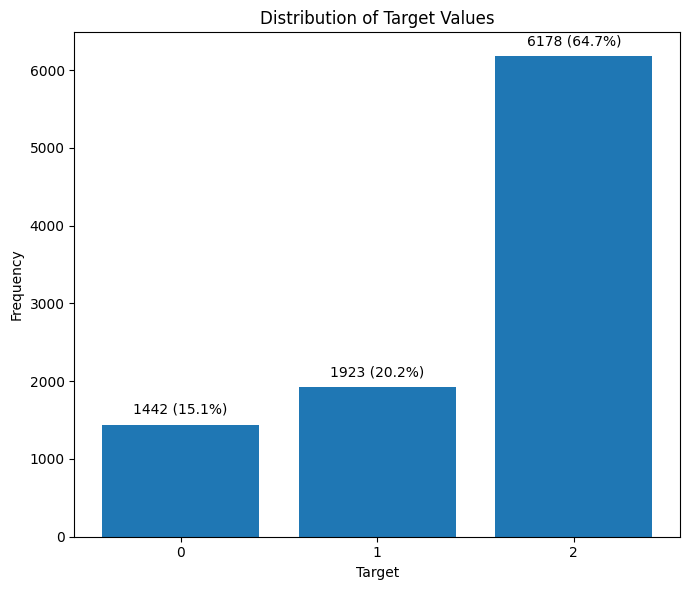

In [10]:
# Compute counts and proportions
label_counts = train_df['label'].value_counts().sort_index()
label_props = train_df['label'].value_counts(normalize=True).sort_index() * 100

# Plot
plt.figure(figsize=(7, 6))
bars = plt.bar(label_counts.index.astype(str), label_counts.values)

# Add text labels (value + %)
for bar, count, prop in zip(bars, label_counts.values, label_props.values):
    label = f"{count} ({prop:.1f}%)"
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, label,
             ha='center', va='bottom', fontsize=10)

# Labels and title
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The dataset is imbalanced, with class 2 representing the majority of the data.

### Text Exploration

In [18]:
train_df["char_len"] = train_df["text"].str.len()
train_df['word_count']  = train_df['text'].apply(lambda x: len(str(x).split()))

In [20]:

train_df.head()

,text,label,word_count,char_len
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10,77
1,$CCL $RCL - Nomura points to bookings weakness...,0,14,102
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14,94
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7,59
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10,71


In [14]:
example = train_df['text'].iloc[0]
print(example)
print("Word:", len(example.split()))

$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT
Word: 10


In [15]:
total = train_df['word_count'].sum()
print(total)

116218


In [24]:
train_df[['word_count','char_len']].describe()

,word_count,char_len
count,9543.000000,9543.000000
mean,12.178351,85.816934
std,4.665599,35.097229
min,1.000000,2.000000
25%,9.000000,58.000000
50%,11.000000,79.000000
75%,15.000000,120.000000
max,32.000000,190.000000


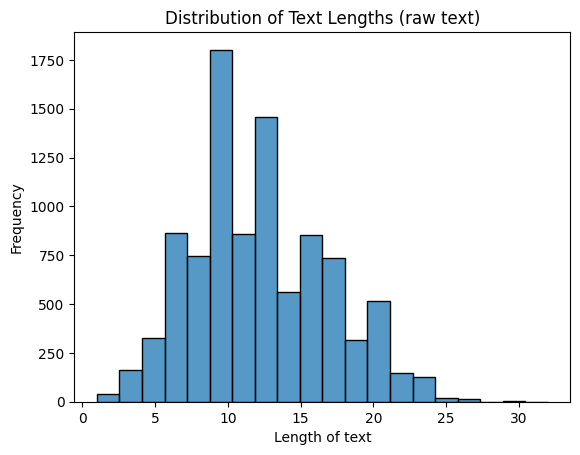

In [17]:
#Plot distribution of text length
sns.histplot(train_df['word_count'], bins=20)
plt.title("Distribution of Text Lengths (raw text)")
plt.xlabel("Length of text")
plt.ylabel("Frequency")
plt.show()

In [26]:
all_words = ' '.join(train_df['text']).split()
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:10]

,count
to,2332
the,1820
of,1464
-,1390
in,1361
on,1136
for,1032
a,970
and,898
The,663


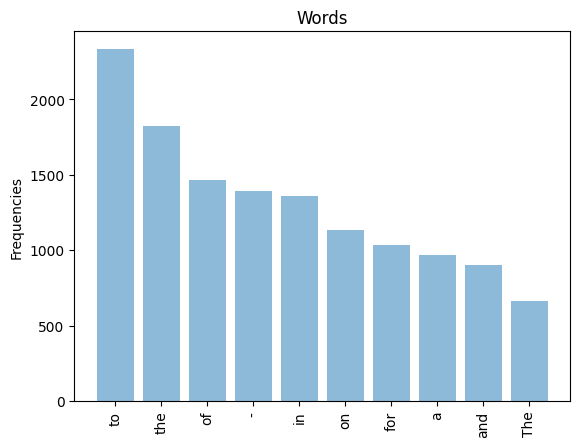

In [27]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

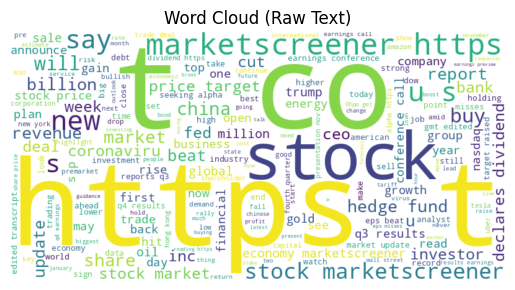

In [28]:
# Create a word cloud from the raw text
raw_text = ' '.join(train_df['text'].fillna('')).lower()
raw_wc = WordCloud(width=800, height=400, background_color='white').generate(raw_text)
plt.imshow(raw_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Raw Text)')
plt.show()

In [33]:
train_df["has_ticker"] = train_df["text"].str.contains(r"\$\w+")
train_df["has_link"] = train_df["text"].str.contains("https")
train_df["has_mention"] = train_df["text"].str.contains("@")
train_df["has_hashtag"] = train_df["text"].str.contains("#")

In [37]:
bool_variable=["has_ticker","has_link","has_mention","has_hashtag"]
for var in bool_variable:
  print(train_df[var].value_counts())

has_ticker
False    7261
True     2282
Name: count, dtype: int64
has_link
False    5073
True     4470
Name: count, dtype: int64
has_mention
False    9249
True      294
Name: count, dtype: int64
has_hashtag
False    8647
True      896
Name: count, dtype: int64


### Text Length Distribution per Sentiment

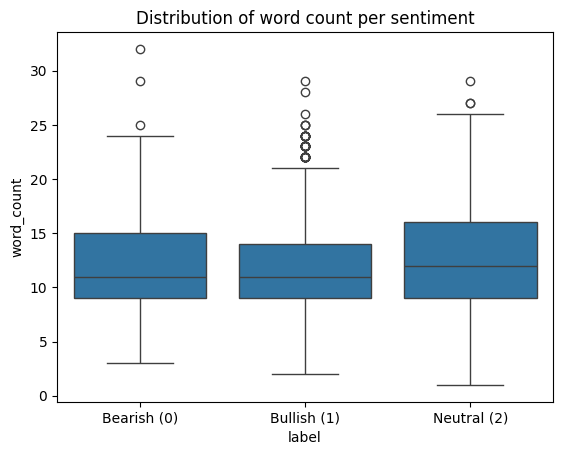

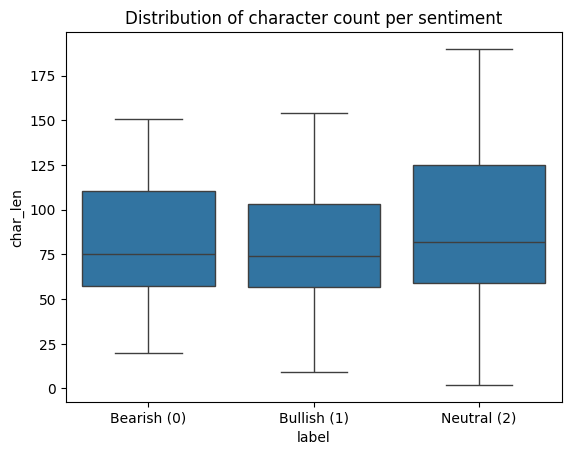

In [38]:
# Number of words
sns.boxplot(x="label", y="word_count", data=train_df)
plt.title("Distribution of word count per sentiment")
plt.xticks([0,1,2], ["Bearish (0)", "Bullish (1)", "Neutral (2)"])
plt.show()

# Number of characters
sns.boxplot(x="label", y="char_len", data=train_df)
plt.title("Distribution of character count per sentiment")
plt.xticks([0,1,2], ["Bearish (0)", "Bullish (1)", "Neutral (2)"])
plt.show()


### Patterns

In [20]:
def check_patterns(df, text_col='text'):
    patterns = {
        'EMAIL': r'\b[\w.-]+?@\w+?\.\w+?\b',
        'COST': r'[$€£]\d+(?:[\.,]?\d+)?',
        'URL': r'http\S+|www\S+|https\S+',
        'HASHTAG': r'#\w+',
        'USER': r'@\w+',
        # dollar sign followed by 1 to 6 capital letters
        'TICKER': r'\$[A-Z]{1,6}\b',
        # Extra chars
        'ELONG': r'(\w)\1{2,}'
    }

    result = {}
    for label, pattern in patterns.items():
        result[label] = df[text_col].apply(lambda x: bool(re.search(pattern, str(x)))).any()
    return result

In [21]:
patterns = check_patterns(train_df, text_col='text') 
print(patterns)

{'EMAIL': np.False_, 'COST': np.True_, 'URL': np.True_, 'HASHTAG': np.True_, 'USER': np.True_, 'TICKER': np.True_, 'ELONG': np.True_}


### Languages

In [5]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"
    
train_df['language'] = train_df['text'].apply(detect_language)

In [6]:
train_df['language'].unique()

array(['en', 'da', 'de', 'af', 'sv', 'no', 'ca', 'fr', 'et', 'es', 'nl',
       'pt', 'tl', 'so', 'fi', 'pl', 'it', 'zh-cn', 'ro', 'id', 'unknown',
       'hu', 'sl', 'cy', 'cs', 'vi', 'lt', 'sk', 'ja', 'sw', 'sq'],
      dtype=object)

In [7]:
print(train_df['language'].value_counts())

language
en         8854
ca          114
de          109
es           89
fr           86
sv           62
da           44
no           28
it           27
nl           24
af           20
pt           13
et           10
tl           10
ro            9
id            8
pl            8
vi            5
unknown       4
so            3
sl            3
fi            2
hu            2
cy            2
zh-cn         1
cs            1
lt            1
sk            1
ja            1
sw            1
sq            1
Name: count, dtype: int64
